**Fabio Zanarello**   
March 2020  
Sanger Institute, Cambridge

## Cell Model Passport: images exploratory analysis 

Here you will find the exploratory analysis of microscope images of some lines from the Cell Model Passport (CMP).   
Follow each cell of this notebook to:
1. Convert from .tiff to .jpg
2. Organize images based on a selected features
3. Classes overview
4. Visualize images and retrieve information


To explore the notebook use:

1. Basic navigation: `enter`, `shift-enter`, `up/k`, `down/j`
2. Saving the notebook: `s`
2. Change Cell types: `y`, `m`, `1-6`, `t`
3. Cell creation: `a`, `b`
4. Cell editing: `x`, `c`, `v`, `d`, `z`
5. Kernel operations: `i`, `0` (press twice)

To learn more click [here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html).

### Libraries    

In [1]:
import os

from CMP_functions.preprocessing import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

Assign to...
- `PATH_data` the folder where you store your data
- `PATH_img` the **images folder** (should be in `data/`)
- `PATH_info` a **.csv** table containing images name and relative features (first column **im_id**)

**EXAMPLE of images_info.csv** 

| **im_id**     | SIDM          | tissue                      |...|Feature_n|
| ------------- |:-------------:| ---------------------------:|---|---------|
| 1877-8278     | SIDM00423     | Haematopoietic and Lymphoid |...|NA|
| 1476-8001     | SIDM01081     | Head and Neck               |...|NA|
| 2195-8403     | SIDM00585     | Liver                       |...|NA|


 


In [2]:
PATH_data = "test_data/"
PATH_img = "test_data/img_tif/"
PATH_info = "test_data/img_info.csv"

To test everything is working, run the cells below, check filenames and table header.

In [3]:
im_names = list_files(PATH_img)

1004-8228.tif
1008-8405.tif
1002-8019.tif
1000-7807.tif
1003-9239.tif


In [4]:
im_info = pd.read_csv(PATH_info) 
im_info.head()

,im_id,Master Cell ID,SIDM,model_name,synonyms,model_type,growth_properties,doi,pmed,model_treatment,...,gender,ethnicity,smoking_status,model_relations_comment,COSMIC_ID,BROAD_ID,CCLE_ID,RRID,HCMI,suppliers
0,1008-8405,1008,SIDM00854,GA-10,NaN,Cell Line,Suspension,NaN,NaN,NaN,...,Male,White,Unknown,GA-10-Clone-4 and GA-10-Clone-20 are subclones...,1303896,ACH-000162,GA10_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CVCL_1222,NaN,ATCC:CRL-2392
1,1000-7807,1000,SIDM01000,WM-115,WM115F;WM115-mel;WC00079,Cell Line,Adherent,NaN,NaN,NaN,...,Female,Unknown,Unknown,"WM115, WM266-4, WM239A and WM165-1 were all de...",909784,ACH-000304,WM115_SKIN,CVCL_0040,NaN,Rockland:WM115
2,1004-8228,1004,SIDM01179,VA-ES-BJ,NaN,Cell Line,Adherent,NaN,NaN,NaN,...,Male,White,Unknown,NaN,688121,ACH-001702,VAESBJ_SOFT_TISSUE,CVCL_1785,NaN,ATCC:CRL-2138
3,1003-9239,1003,SIDM00391,SK-MM-2,NaN,Cell Line,Suspension,NaN,NaN,NaN,...,Male,Unknown,Unknown,NaN,753612,ACH-000363,SKMM2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CVCL_1699,NaN,DSMZ:ACC-430
4,1002-8019,1002,SIDM00241,OCUB-M,OCUB-1M,Cell Line,Adherent,NaN,NaN,NaN,...,Female,East Asian,Unknown,NaN,909256,ACH-002179,OCUBM_BREAST,CVCL_1621,NaN,RIKEN:RCB0881


Last step is to check for consistency between name of images and table info.

In [5]:
consistent, missing_file, missing_info = check_consistency(im_names, im_info)


Found 5 consistent file and info out of 5 images and 5 info
0 missing file found
0 missing info found


If you found missing files or info you can check their names:

In [6]:
missing_file

[]

In [7]:
missing_info

[]

## 1. From .tiff to .jpg

Usalully microscope images are in .tiff format, wich is great in terms of quality but also  heavy. In this notebook we want to load and look at those images as fast as possible, our first step will be to convert them in .jpg.

If you already have .jpg images, just assign .jpg folder path to `PATH_jpg` . 

`convert_tif` takes all the .tiff images and creates a folder in `PATH_data` containing converted .jpg. Then return the folder path. 

In [8]:
PATH_jpg = convert_tif(PATH_img, PATH_data)

Directory  test_data/img_jpg/  Created 
Converted 5 images and saved at test_data/img_jpg/ 


## 2. Organize images based on feature 

In order to organize better the images, a good strategy is to split them in sub-folder describing a given feature.

In [9]:
#Subset the im_info in order to have only conistend image names
im_info = im_info[im_info['im_id'].isin(consistent)]

In [10]:
#Select the feature you want to split on (must be in im_info.columns)
feature = 'tissue'

In [11]:
#extract features classes (last argument is minumn number of observatios per class)
class_count, class_list = get_classes(im_info, feature, 1)

#Generate a dictionary of image name to class
name_to_class = dict(zip(im_info['im_id'], im_info[feature]))

In [12]:
#create feature directory and classes sub-dirs
create_class_folders(class_list, feature, PATH_data)

Successfully created the directory tissue
Successfully created the sub-directory Haematopoietic and Lymphoid
Successfully created the sub-directory Breast
Successfully created the sub-directory Skin
Successfully created the sub-directory Soft Tissue


In [13]:
#link images to class sun-dir 
link_images(PATH_jpg, name_to_class, PATH_data+feature)

Link successfully created
Link successfully created
Link successfully created
Link successfully created
Link successfully created
Images linked to feature folders


## 3. Classes overview

`get_overview` gives summary statistic about the chosen feature and plot the distribution of each class. I you want to explore other feature go back and repeat step 2.

5 images are subdividen in 4 tissue

Haematopoietic and Lymphoid: 2
Breast: 1
Skin: 1
Soft Tissue: 1


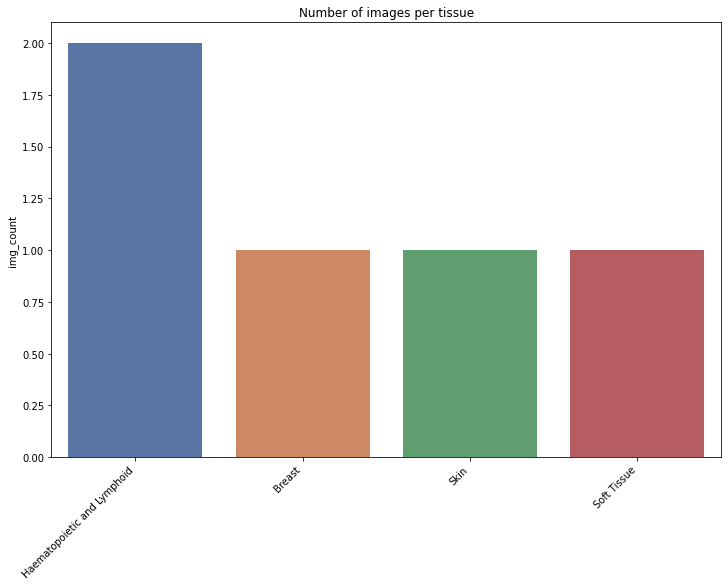

In [14]:
ft_plot = get_overview(feature, class_count)

**If you want to save this figure, uncomment the cell below**

In [15]:
#save_fig(ft_plot, PATH_data, feature)

## 4. Visualize images and retrieve information

### Selecting by class

Here you can visualize one or more images giving the features you selected and the classes available. If you want to explore another feature go back to step 2.

In [16]:
print_classes(class_list)

Available classes:

Haematopoietic and Lymphoid
Breast
Skin
Soft Tissue


In [17]:
#Select your class of inerest
cl = 'Skin'
#Number of images to print (randomly chosen), or 'a' to print all
n = 1

YOU ARE LOOKIG AT:
Image name: 1000-7807
Tissue: Skin
Cancer type:Melanoma
Model name: WM-115

FOR MORE INFO CHCK:
https://cellmodelpassports.sanger.ac.uk/passports/SIDM01000


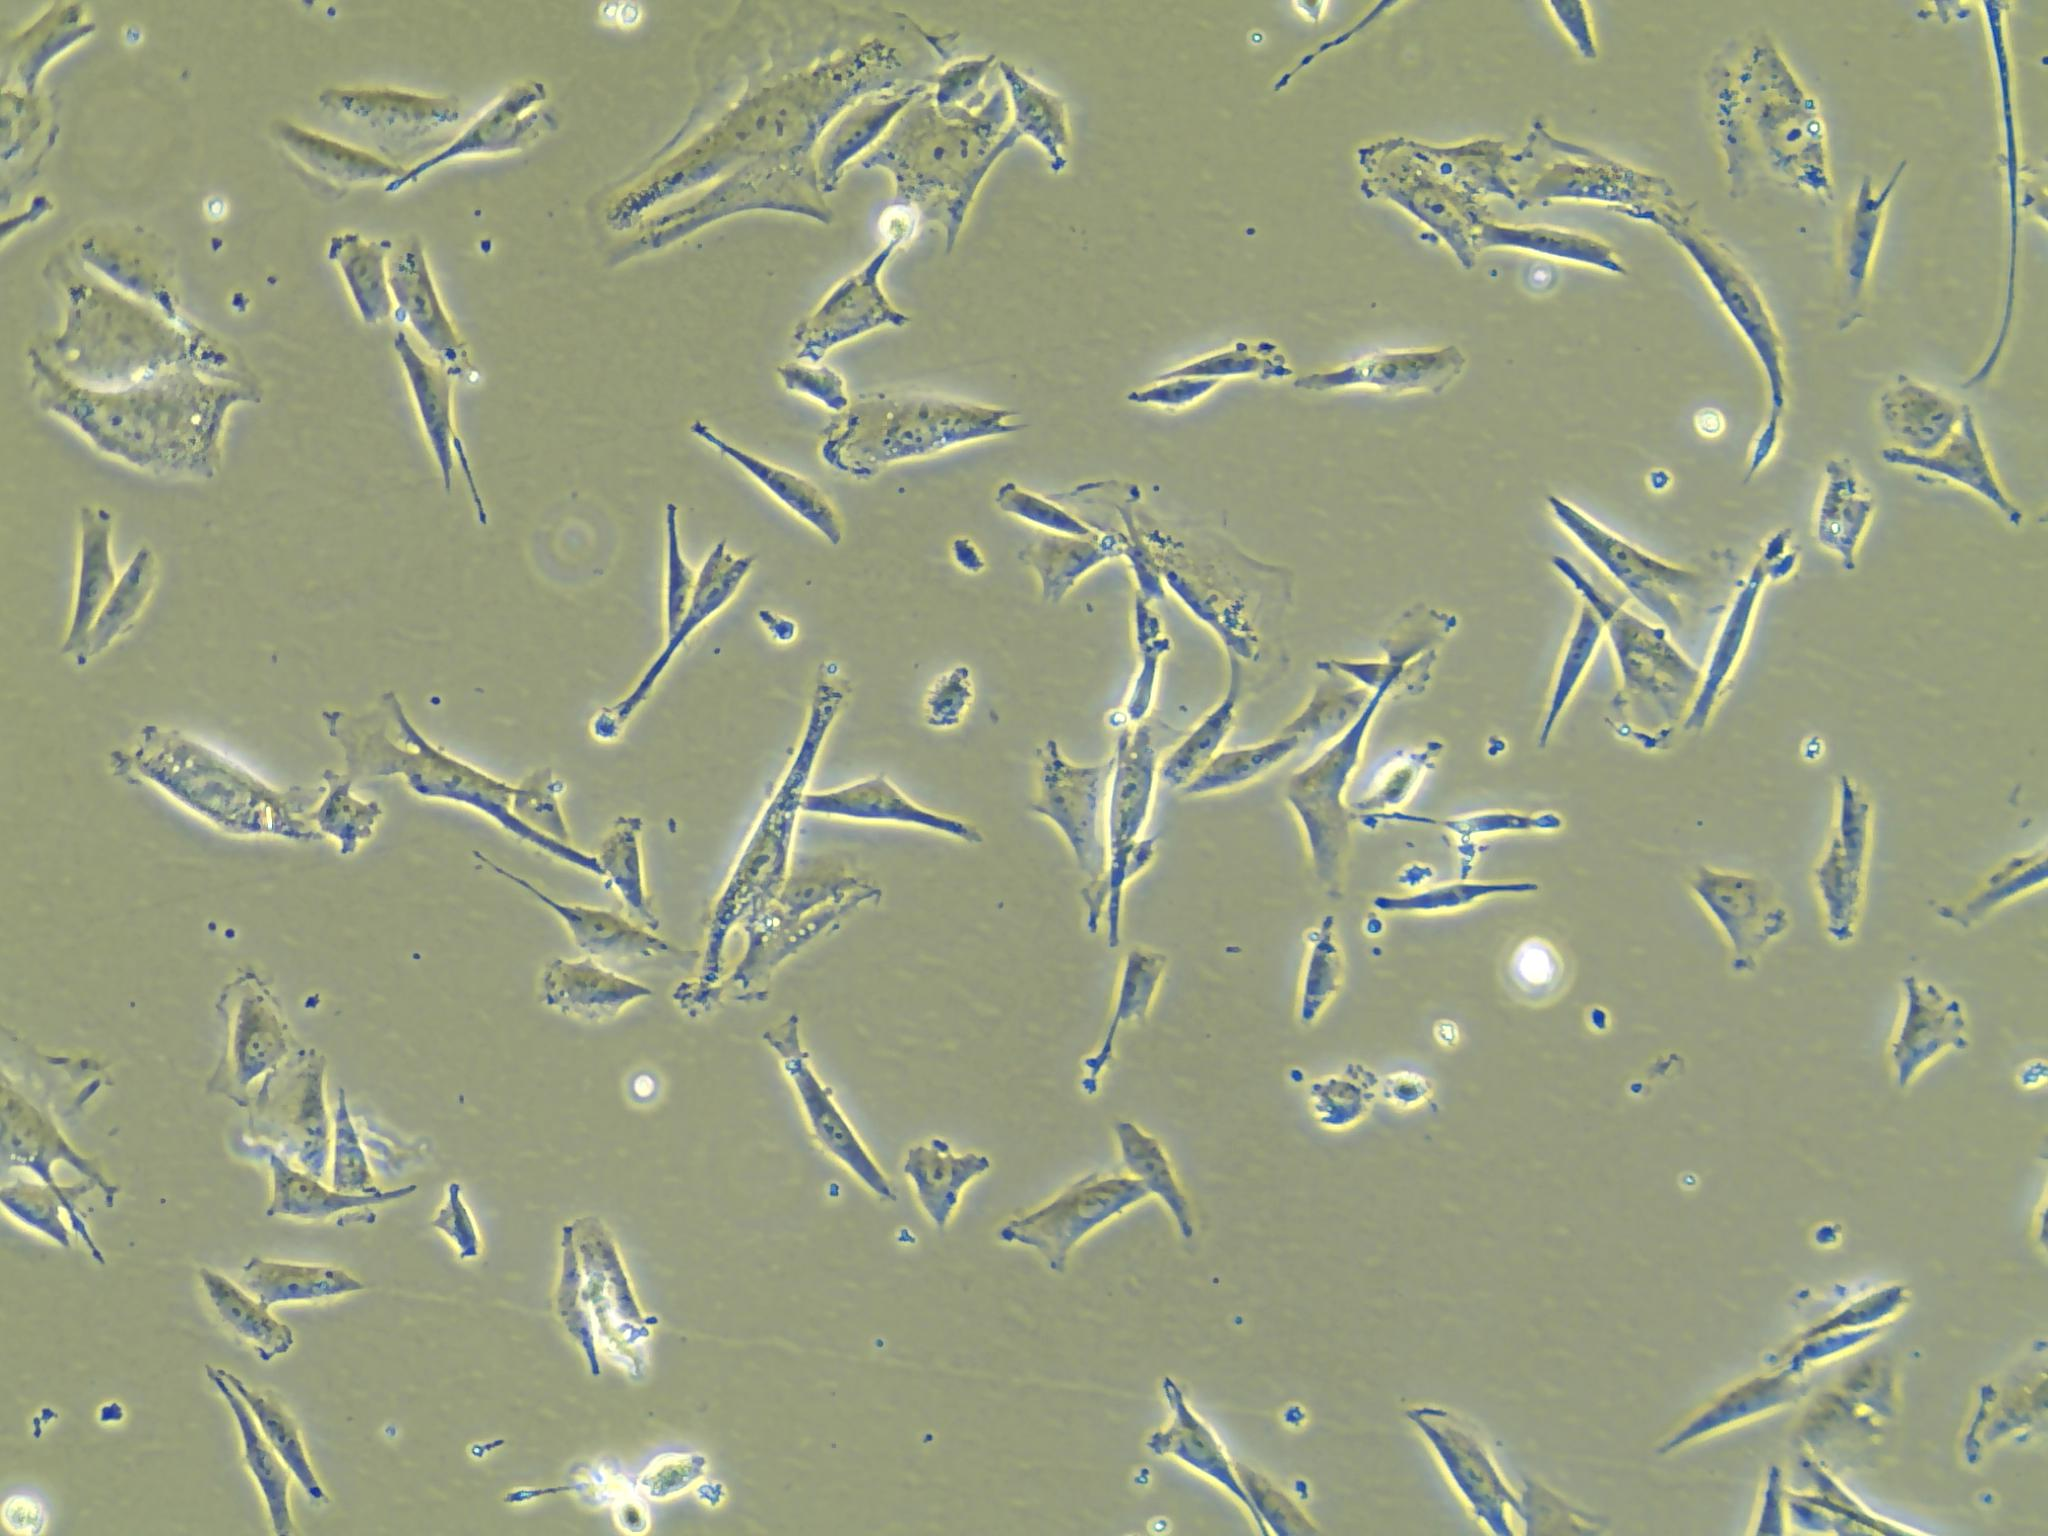

In [18]:
#this function displays pictures of your class of interest 
view_img(PATH_data, feature, cl, im_info, n)